In [2]:
# importing libraries
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader
from imblearn.combine import SMOTETomek
from sklearn.linear_model import LogisticRegression

In [17]:
# load dataset
data = pd.read_csv("dataset/preprocessed.csv")
data = data.drop(data[data.target == -1].index)
data.shape

(762094, 44)

In [4]:
# Separate input features and target
targets = data.target
targets -= 1
targets.head()
targets = targets.to_numpy()

In [5]:
features = data.drop('target', axis=1)

In [6]:
features = features.to_numpy()

In [7]:
#split test data
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.2, random_state = 0)

In [8]:
# print distribution before re-sampling
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [ 62846  69846 109216 147032 220735]]


In [9]:
#apply re-sampling
sm = SMOTETomek(random_state = 27, n_jobs = -1)
X_train, y_train = sm.fit_sample(X_train, y_train)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'k' is deprecated from 0.2 and will be removed in 0.4. Use 'k_neighbors' instead.
  category=DeprecationWarning)
/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/imblearn/utils/deprecation.py:50: DeprecationWarning: 'm' is deprecated from 0.2 and will be removed in 0.4. Use 'm_neighbors' instead.
  category=DeprecationWarning)


In [10]:
# print distribution after re-sampling
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[     0      1      2      3      4]
 [204152 195863 187569 181912 186017]]


In [11]:
#Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/emreunel/anaconda3/envs/ass3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
# apply logistic regression
logisticRegr = LogisticRegression(solver= 'saga', n_jobs = -1, multi_class = 'multinomial')

In [13]:
# fit data
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=-1, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# predict test data
predictions = logisticRegr.predict(X_test)

In [15]:
# print results
score = logisticRegr.score(X_test, y_test)
print(score)

0.39470144798220697


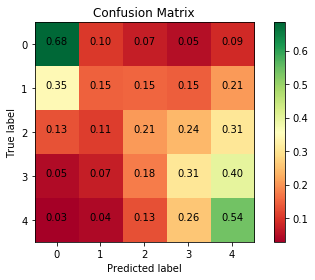

array([[0.68395015, 0.10464024, 0.07151356, 0.05228881, 0.08760724],
       [0.34598817, 0.14806731, 0.15352363, 0.14668887, 0.20573201],
       [0.13387998, 0.11020003, 0.20793499, 0.24106486, 0.30692014],
       [0.04669673, 0.07187874, 0.1770075 , 0.30617733, 0.3982397 ],
       [0.02927441, 0.04268503, 0.13068997, 0.25703694, 0.54031364]])

In [16]:
# show confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.imshow(cm, interpolation='nearest',cmap="RdYlGn")
plt.title("Confusion Matrix")
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
for i in range(5):
    for j in range(5):
        plt.text(j,i,format(cm[i][j],".2f"),horizontalalignment="center",color="black")
plt.tight_layout()
plt.show()
cm